### Ethnicolr: NC Voter Registration Name Model

We build new LSTM models based on NC data. We start by assuming y = concatenation of ethnic code and race code. We remove U and also UN --- assuming they are 'missing at random.' This gives us 12 categories.


In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
NGRAMS = (2, 3)
SAMPLE = 1000000
EPOCHS = 15

# Florida voter
df = pd.read_csv('/opt/data/nc_voter/nc_voter_name_gender_race_ethnic_age.csv', usecols=['last_name', 'first_name', 'race_code', 'ethnic_code'], nrows=SAMPLE * 2)
df.dropna(subset=['first_name', 'last_name'], inplace=True)

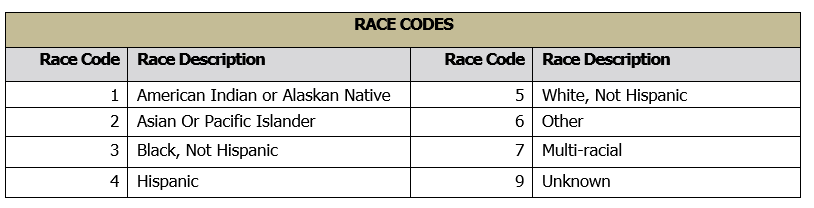

### Drop U and UN from race and ethnic.

In [3]:
df.drop(df[(df.race_code=='U')|(df.ethnic_code=='UN')].index, inplace=True)
df

,last_name,first_name,race_code,ethnic_code
0,AABEL,EVELYN,W,NL
2,AARON,CLAUDIA,W,NL
6,AARON,SANDRA,W,HL
7,AARON,WILLIE,W,NL
8,AARONSON,GENA,W,NL
9,AARONSON,MICHAEL,W,NL
10,ABAD,PRISCILLA,O,HL
11,ABADIE,COLLEEN,M,HL
12,ABADIE,JACK,W,NL
14,ABADILLA,STEVE,O,NL


In [4]:
df.groupby(['race_code', 'ethnic_code']).size()

race_code  ethnic_code
A          HL                 149
           NL               10142
B          HL                1497
           NL              266127
I          HL                 157
           NL                5284
M          HL                2634
           NL                5054
O          HL               18580
           NL               17627
W          HL               10598
           NL             1210076
dtype: int64

In [5]:
df['race'] = df['ethnic_code'] + '+' + df['race_code']
df

,last_name,first_name,race_code,ethnic_code,race
0,AABEL,EVELYN,W,NL,NL+W
2,AARON,CLAUDIA,W,NL,NL+W
6,AARON,SANDRA,W,HL,HL+W
7,AARON,WILLIE,W,NL,NL+W
8,AARONSON,GENA,W,NL,NL+W
9,AARONSON,MICHAEL,W,NL,NL+W
10,ABAD,PRISCILLA,O,HL,HL+O
11,ABADIE,COLLEEN,M,HL,HL+M
12,ABADIE,JACK,W,NL,NL+W
14,ABADILLA,STEVE,O,NL,NL+O


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.groupby(['race']).size()

race
HL+A       149
HL+B      1491
HL+I       156
HL+M      2606
HL+O     17325
HL+W     10281
NL+A      9682
NL+B    215904
NL+I      5048
NL+M      5016
NL+O     17326
NL+W    829509
dtype: int64

In [8]:
sdf = df.sample(SAMPLE, random_state=21)
sdf

,last_name,first_name,race_code,ethnic_code,race
61254,MADARASZ,AGNES,W,NL,NL+W
1205421,ESTEP,DONNA,W,NL,NL+W
1348373,MINAHAN,SHELBY,W,NL,NL+W
13816,BUSH,DAVID,W,NL,NL+W
1051654,RODRIGUEZ,ROBERT,O,NL,NL+O
204373,BISSEY,MARGARET,W,NL,NL+W
896485,CHADWICK,VIRGINIA,B,NL,NL+B
1635430,FRIDLEY,PATRICIA,W,NL,NL+W
1559155,PRICE,EVERETT,B,NL,NL+B
84330,ROBINSON,RACHEL,W,NL,NL+W


In [9]:
# Additional features
sdf['first_name'] = sdf.first_name.str.title()
sdf['last_name'] = sdf.last_name.str.title()

sdf.groupby('race').agg({'first_name': 'count'})

,first_name
race,
HL+A,127
HL+B,1351
HL+I,140
HL+M,2360
HL+O,15499
HL+W,9259
NL+A,8646
NL+B,193709
NL+I,4529


## Preprocessing the input data

In [10]:
%%time
# concat last name and first name
sdf['last_name_first_name'] = sdf['last_name'] + ' ' + sdf['first_name']

# build n-gram list
vect = CountVectorizer(analyzer='char', max_df=0.3, min_df=10, ngram_range=NGRAMS, lowercase=False) 
a = vect.fit_transform(sdf.last_name_first_name)
vocab = vect.vocabulary_

# sort n-gram by freq (highest -> lowest)
words = []
for b in vocab:
    c = vocab[b]
    #print(b, c, a[:, c].sum())
    words.append((a[:, c].sum(), b))
    #break
words = sorted(words, reverse=True)
words_list = [w[1] for w in words]
num_words = len(words_list)
print("num_words = %d" % num_words)

num_words = 11666
CPU times: user 48min 45s, sys: 748 ms, total: 48min 46s
Wall time: 48min 47s


In [11]:
vocab

{'Ma': 2393,
 'ad': 4084,
 'da': 5050,
 'ar': 4350,
 'ra': 9252,
 'as': 4379,
 'sz': 9987,
 'z ': 11438,
 ' A': 2,
 'Ag': 593,
 'gn': 6202,
 'ne': 8171,
 'es': 5717,
 'Mad': 2398,
 'ada': 4087,
 'dar': 5066,
 'ara': 4353,
 'ras': 9273,
 'asz': 4405,
 'sz ': 9988,
 'z A': 11439,
 ' Ag': 11,
 'Agn': 600,
 'gne': 6205,
 'nes': 8193,
 'Es': 1408,
 'st': 9929,
 'te': 10082,
 'ep': 5669,
 'p ': 8983,
 ' D': 51,
 'Do': 1173,
 'on': 8739,
 'nn': 8304,
 'na': 8096,
 'Est': 1420,
 'ste': 9935,
 'tep': 10101,
 'ep ': 5670,
 'p D': 8987,
 ' Do': 60,
 'Don': 1186,
 'onn': 8756,
 'nna': 8307,
 'Mi': 2467,
 'in': 6857,
 'ah': 4166,
 'ha': 6333,
 'an': 4293,
 'n ': 8044,
 ' S': 238,
 'Sh': 3217,
 'he': 6381,
 'el': 5577,
 'lb': 7456,
 'by': 4718,
 'Min': 2478,
 'ina': 6860,
 'nah': 8106,
 'aha': 4169,
 'han': 6350,
 'an ': 4294,
 'n S': 8063,
 ' Sh': 242,
 'She': 3219,
 'hel': 6393,
 'elb': 5581,
 'lby': 7465,
 'Bu': 911,
 'us': 10667,
 'sh': 9794,
 'h ': 6290,
 'Da': 1083,
 'av': 4451,
 'vi': 10808,


In [12]:
from itertools import chain

def n_grams(seq, n=1):
    """Returns an itirator over the n-grams given a listTokens"""
    shiftToken = lambda i: (el for j,el in enumerate(seq) if j>=i)
    shiftedTokens = (shiftToken(i) for i in range(n))
    tupleNGrams = zip(*shiftedTokens)
    return tupleNGrams # if join in generator : (" ".join(i) for i in tupleNGrams)

def range_ngrams(listTokens, ngramRange=(1,2)):
    """Returns an itirator over all n-grams for n in range(ngramRange) given a listTokens."""
    ngrams = (ngramRange[0], ngramRange[1] + 1)
    return chain(*(n_grams(listTokens, i) for i in range(*ngramRange)))

In [13]:
%%time
def find_ngrams(text, ngrams):
    a = range_ngrams(text, ngrams)
    wi = []
    for i in a:
        w = ''.join(i)
        try:
            idx = words_list.index(w)
        except:
            idx = 0
        wi.append(idx)
    return wi

# build X from index of n-gram sequence
X = np.array(sdf.last_name_first_name.apply(lambda c: find_ngrams(c, NGRAMS)))

# check max/avg feature
X_len = []
for x in X:
    X_len.append(len(x))

max_feature_len = max(X_len)
avg_feature_len = int(np.mean(X_len))

print("Max feature len = %d, Avg. feature len = %d" % (max_feature_len, avg_feature_len))
y = np.array(sdf.race.astype('category').cat.codes)

# Split train and test dataset
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

Max feature len = 37, Avg. feature len = 12
CPU times: user 1min 46s, sys: 468 ms, total: 1min 46s
Wall time: 1min 46s


## Train a LSTM model

ref: http://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [14]:
'''The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
Notes:

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Activation
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import load_model

max_features = num_words # 20000
feature_len = 25 # avg_feature_len # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=feature_len)
X_test = sequence.pad_sequences(X_test, maxlen=feature_len)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Using TensorFlow backend.


800000 train sequences
200000 test sequences
Pad sequences (samples x time)
X_train shape: (800000, 25)
X_test shape: (200000, 25)
12 classes
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (800000, 12)
y_test shape: (200000, 12)


In [15]:
print('Build model...')

if False:
    model = Sequential()
    model.add(Embedding(num_words, 32, input_length=feature_len))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
if True:
    embedding_vecor_length = 50
    model = Sequential()
    model.add(Embedding(num_words, embedding_vecor_length, input_length=feature_len))
    model.add(Conv1D(activation="relu", padding="same", filters=32, kernel_size=3))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(100))
    model.add(Dense(num_classes, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Build model...






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 50)            583300    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            4832      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1212      
Total params: 642,544
Trainable params: 642,544
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
%%time
print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, epochs=EPOCHS,
          validation_split=0.1, verbose=1)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size, verbose=1)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 720000 samples, validate on 80000 samples
Epoch 1/15





720000/720000 [==============================] - 608s 845us/step - loss: 0.6469 - acc: 0.7810 - val_loss: 0.6052 - val_acc: 0.7928
Epoch 2/15
720000/720000 [==============================] - 557s 774us/step - loss: 0.5935 - acc: 0.7956 - val_loss: 0.5851 - val_acc: 0.7979
Epoch 3/15
720000/720000 [==============================] - 597s 829us/step - loss: 0.5758 - acc: 0.8006 - val_loss: 0.5744 - val_acc: 0.8013
Epoch 4/15
720000/720000 [==============================] - 585s 812us/step - loss: 0.5639 - acc: 0.8040 - val_loss: 0.5771 - val_acc: 0.7968
Epoch 5/15
720000/720000 [==============================] - 521s 724us/step - loss: 0.5564 - acc: 0.8064 - val_loss: 0.5669 - val_acc: 0.8033
Epoch 6/15
720000/720000 [==============================] - 596s 828us/step - loss: 0.5502 - acc: 0.8080 - val_loss: 0.5669 - va

In [17]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.572925552418232
Test accuracy: 0.803085


## Confusion Matrix

In [21]:
y_pred = model.predict_classes(X_test, verbose=2)
p = model.predict_proba(X_test, verbose=2) # to predict probability
target_names = list(sdf.race.astype('category').cat.categories)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(conf_mat)

              precision    recall  f1-score   support

        HL+A       0.00      0.00      0.00        25
        HL+B       0.00      0.00      0.00       270
        HL+I       0.00      0.00      0.00        28
        HL+M       0.00      0.00      0.00       472
        HL+O       0.44      0.54      0.49      3100
        HL+W       0.33      0.00      0.00      1852
        NL+A       0.55      0.33      0.41      1729
        NL+B       0.68      0.43      0.52     38742
        NL+I       0.33      0.06      0.10       906
        NL+M       0.00      0.00      0.00       903
        NL+O       0.30      0.06      0.10      3112
        NL+W       0.83      0.95      0.89    148861

    accuracy                           0.80    200000
   macro avg       0.29      0.20      0.21    200000
weighted avg       0.77      0.80      0.78    200000

[[     0      0      0      0      8      0      3      1      0      0
       1     12]
 [     0      0      0      0     48      0 

In [24]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

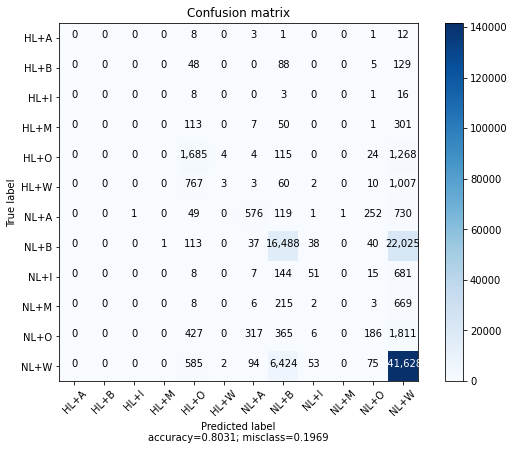

In [26]:
plot_confusion_matrix(conf_mat, target_names, normalize=False)

### Save model

In [19]:
#model.save('../models/nc_voter_name_lstm.h5')
model.save('/opt/github/ethnicolr/ethnicolr/models/nc_voter_reg/nc_voter_name_lstm.h5')

In [20]:
words_df = pd.DataFrame(words_list, columns=['vocab'])
#words_df.to_csv('../models/nc_voter_name_vocab.csv', index=False, encoding='utf-8')
words_df.to_csv('/opt/github/ethnicolr/ethnicolr/models/nc_voter_reg/nc_voter_name_vocab.csv', index=False, encoding='utf-8')